### Principal Component Analysis applied to images

This notebook is based on Shankar Muthuswamy's example at https://shankarmsy.github.io/posts/pca-sklearn.html

In [9]:
#Before using PCA, let us try and understand as well as display the original images.
#Note the Olivetti faces data is available in scikit-learn but not locally. It needs to be downloaded.
from sklearn.datasets import fetch_olivetti_faces
oliv=fetch_olivetti_faces()
print oliv.keys()
print oliv.data.shape 
#tells us there are 400 images that are 64 x 64 (4096) pixels each

['images', 'data', 'target', 'DESCR']
(400, 4096)


In [10]:
oliv

{'DESCR': 'Modified Olivetti faces dataset.\n\nThe original database was available from (now defunct)\n\n    http://www.uk.research.att.com/facedatabase.html\n\nThe version retrieved here comes in MATLAB format from the personal\nweb page of Sam Roweis:\n\n    http://www.cs.nyu.edu/~roweis/\n\nThere are ten different images of each of 40 distinct subjects. For some\nsubjects, the images were taken at different times, varying the lighting,\nfacial expressions (open / closed eyes, smiling / not smiling) and facial\ndetails (glasses / no glasses). All the images were taken against a dark\nhomogeneous background with the subjects in an upright, frontal position (with\ntolerance for some side movement).\n\nThe original dataset consisted of 92 x 112, while the Roweis version\nconsists of 64x64 images.\n',
 'data': array([[ 0.30991736,  0.36776859,  0.41735536, ...,  0.15289256,
          0.16115703,  0.1570248 ],
        [ 0.45454547,  0.47107437,  0.51239669, ...,  0.15289256,
          0.1

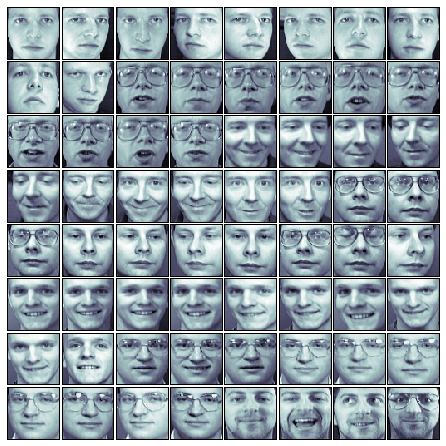

In [13]:
#Setup a figure 6 inches by 6 inches
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(oliv.images[i], cmap=plt.cm.bone, interpolation='nearest')
plt.show()

In [16]:
#Let's see how much of the variance is retained if we compressed these down to a 8x8 (64) pixel images.
from sklearn.decomposition import PCA
import numpy as np
X,y=oliv.data, oliv.target
pca_oliv = PCA(64)
X_proj = pca_oliv.fit_transform(X)
print X_proj.shape 

(400, 64)


In [19]:
print np.cumsum(pca_oliv.explained_variance_ratio_.sum())
#That's terrific, compressing a 64x64 pixel image down to an 8x8 image
#still retains about 89.7% of the variance

[ 0.89741325]


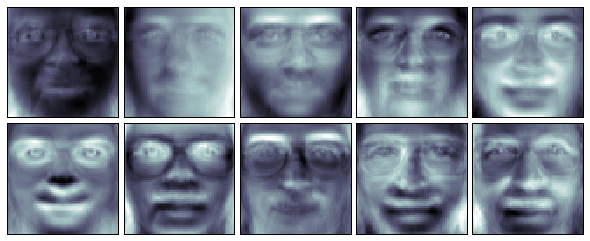

In [22]:
# This is great so far. Now we have a reduced 64 dimension dataset, generated with 64 principal components.
# Each of these principal components can explain some variation in the original dataset.
# The parameter components_ of the #estimator object gives the components with maximum variance

# Below we'll try to visualize the top 8 principal components. 
# This is NOT a reconstruction of the original data, just 
# visualizing the principal components as images.
# The principal components are vectors of the length = to the number of # features 4096.
# We'll need to reshape it to a 64 x 64 matrix.

# Setup a figure 8 inches by 8 inches
fig = plt.figure(figsize=(8,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the faces, each image is 64 by 64 pixels
for i in range(10):
    ax = fig.add_subplot(5, 5, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(pca_oliv.components_[i,:], (64,64)), cmap=plt.cm.bone, interpolation='nearest')

In [ ]:
# Awesome, let's now try to reconstruct the images using the new reduced dataset. In other words, we transformed the
# 64x64 pixel images into 8x8 images. Now to visualize how these images look we need to inverse transform the 8x8 images
# back to 64x64 dimension. Note that we're not reverting back to the original data, we're simply going back to the
# actual dimension of the original images so we can visualize them.

X_inv_proj = pca_oliv.inverse_transform(X_proj)
#reshaping as 400 images of 64x64 dimension
X_proj_img = np.reshape(X_inv_proj,(400,64,64))
